In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/questdb-audcad-csv/questdb-audcad.csv


In [5]:
df0 = pd.read_csv('/kaggle/input/questdb-audcad-csv/questdb-audcad.csv')
df0['timestamp'] = pd.to_datetime(df0['timestamp'])
df0.set_index('timestamp', inplace = True)

In [6]:
print(df0.describe())
print('=' * 70)
print(df0.info())

               open          high           low         close
count  3.869801e+06  3.869801e+06  3.869801e+06  3.869801e+06
mean   9.026465e-01  9.026659e-01  9.026271e-01  9.026465e-01
std    1.286702e-02  1.286455e-02  1.286953e-02  1.286704e-02
min    8.442700e-01  8.445750e-01  8.441700e-01  8.442700e-01
25%    8.928800e-01  8.929000e-01  8.928650e-01  8.928800e-01
50%    9.027750e-01  9.027900e-01  9.027550e-01  9.027750e-01
75%    9.121250e-01  9.121450e-01  9.121100e-01  9.121250e-01
max    9.376950e-01  9.377100e-01  9.376550e-01  9.377050e-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869801 entries, 0 to 3869800
Data columns (total 6 columns):
 #   Column     Dtype              
---  ------     -----              
 0   timestamp  datetime64[ns, UTC]
 1   symbol     object             
 2   open       float64            
 3   high       float64            
 4   low        float64            
 5   close      float64            
dtypes: datetime64[ns, UTC](1), float64(4)

In [7]:
print('Start time:', df0.index.min())
print('End Time: ', df0.index.max())
print(df0.index.max() - df0.index.min())


Start time: 2024-02-18 22:08:40+00:00
End Time:  2025-11-14 21:59:50+00:00
634 days 23:51:10


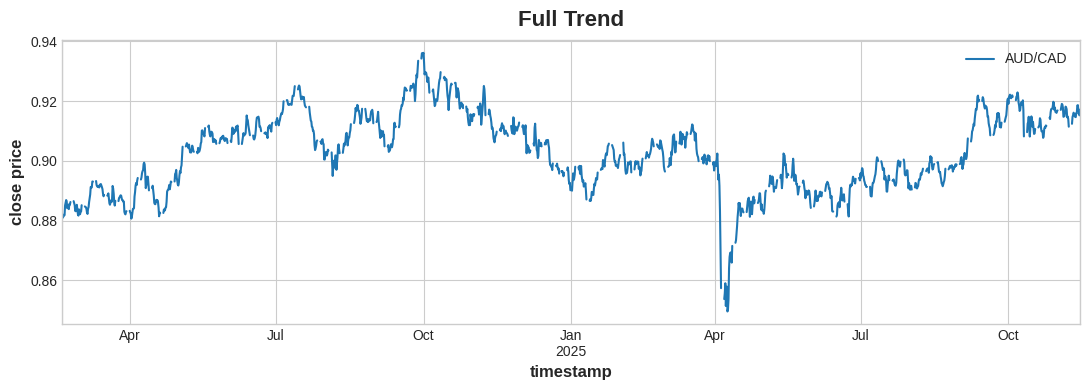

In [5]:
df0['close'].resample('8H').mean().plot(label = 'AUD/CAD')
# df0['close'].plot(label = 'AUD/CAD')
plt.ylabel('close price')
plt.title('Full Trend')
plt.legend()

# Visulization  
## Full trend of data AUD/CAD

## Candlestick Chart 
「based on day/week/month」 
「zoom in/out available」

                               open      high       low     close
timestamp                                                        
2024-02-18 00:00:00+00:00  0.880415  0.881210  0.880165  0.881095
2024-02-19 00:00:00+00:00  0.881085  0.882550  0.880725  0.881605
2024-02-20 00:00:00+00:00  0.881595  0.888970  0.881045  0.886215
2024-02-21 00:00:00+00:00  0.886275  0.887725  0.883060  0.884465
2024-02-22 00:00:00+00:00  0.884465  0.886675  0.882965  0.884280
...                             ...       ...       ...       ...
2024-12-27 00:00:00+00:00  0.896705  0.896995  0.893885  0.895900
2024-12-28 00:00:00+00:00       NaN       NaN       NaN       NaN
2024-12-29 00:00:00+00:00  0.895860  0.897840  0.895805  0.896500
2024-12-30 00:00:00+00:00  0.896510  0.899075  0.891905  0.892245
2024-12-31 00:00:00+00:00  0.892330  0.894195  0.889175  0.889250

[318 rows x 4 columns]


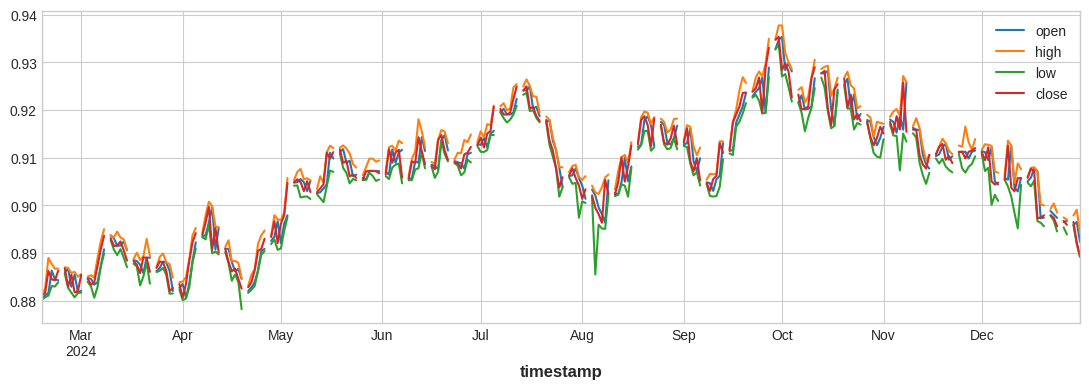

In [7]:
df_sample = df0.loc['2024'].resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
})
print(df_sample)
df_sample.plot()
df_sample =df_sample.dropna()

In [8]:
# prepare moving average data/columns
periods = [5, 20, 30]
colors = ['orange', 'magenta', 'ForestGreen']
for period in periods:
    name = f'MA{period}'
    df_sample[name] = df_sample['close'].rolling(period).mean()
# print(df_sample)
print(df_sample[['close', 'MA5', 'MA20', 'MA30']].iloc[100:120])

                              close       MA5      MA20      MA30
timestamp                                                        
2024-06-13 00:00:00+00:00  0.911360  0.909863  0.908197  0.907976
2024-06-14 00:00:00+00:00  0.908605  0.910465  0.908324  0.908170
2024-06-16 00:00:00+00:00  0.908200  0.910263  0.908412  0.908352
2024-06-17 00:00:00+00:00  0.907550  0.909997  0.908502  0.908487
2024-06-18 00:00:00+00:00  0.913685  0.909880  0.908919  0.908796
2024-06-19 00:00:00+00:00  0.914730  0.910554  0.909300  0.908919
2024-06-20 00:00:00+00:00  0.911465  0.911126  0.909512  0.908976
2024-06-21 00:00:00+00:00  0.909535  0.911393  0.909630  0.908922
2024-06-23 00:00:00+00:00  0.908985  0.911680  0.909720  0.908831
2024-06-24 00:00:00+00:00  0.908780  0.910699  0.909824  0.908827
2024-06-25 00:00:00+00:00  0.907740  0.909301  0.909889  0.908774
2024-06-26 00:00:00+00:00  0.910680  0.909144  0.909836  0.908927
2024-06-27 00:00:00+00:00  0.911020  0.909441  0.909941  0.909080
2024-06-28

In [9]:
diff = df_sample['MA5'] - df_sample['MA30']
# golden_cross.index[golden_cross]
df_sample['golden_cross'] = (diff > 0) & (diff.shift(1) <= 0)
df_sample['death_cross'] = (diff < 0) & (diff.shift(1) >= 0) 
print(df_sample.tail())
print(df_sample.index[df_sample['golden_cross']])
print(df_sample.index[df_sample['death_cross']])


                               open      high       low     close       MA5  \
timestamp                                                                     
2024-12-26 00:00:00+00:00  0.896475  0.897455  0.895360  0.896715  0.897100   
2024-12-27 00:00:00+00:00  0.896705  0.896995  0.893885  0.895900  0.896700   
2024-12-29 00:00:00+00:00  0.895860  0.897840  0.895805  0.896500  0.896415   
2024-12-30 00:00:00+00:00  0.896510  0.899075  0.891905  0.892245  0.895395   
2024-12-31 00:00:00+00:00  0.892330  0.894195  0.889175  0.889250  0.894122   

                               MA20      MA30  golden_cross  death_cross  
timestamp                                                                 
2024-12-26 00:00:00+00:00  0.903144  0.905653         False        False  
2024-12-27 00:00:00+00:00  0.902330  0.905174         False        False  
2024-12-29 00:00:00+00:00  0.901904  0.904762         False        False  
2024-12-30 00:00:00+00:00  0.901299  0.904132         False        Fals

In [10]:
import plotly.graph_objects as go


# create the candlestick trace
candlestick_trace = go.Candlestick(
    x = df_sample.index,
    open = df_sample['open'],
    high = df_sample['high'],
    low = df_sample['low'],
    close = df_sample['close'],
    name = 'Market'
)

fig = go.Figure(data = [candlestick_trace])

for period, color in zip(periods, colors):
    name = f'MA{period}'
    fig.add_trace(go.Scatter(
        name = f'MA{period}',
        x = df_sample.index,
        y = df_sample[name],
        opacity= 0.8,
        line = dict(color = color, width = 1.5)
    ))


# Customize the layout
fig.update_layout(
    title=f'AUD/CAD Candlestick Chart for 2024-08 (1-Day Intervals)',
    yaxis_title='Price',
    xaxis_title='Time (Day of Month)',
    xaxis_rangeslider_visible= True, 
    template='plotly_dark'           
)

fig.add_trace(go.Scatter(
    x = df_sample.index[df_sample['golden_cross']],
    y = df_sample.loc[df_sample['golden_cross'], 'MA5'],
    mode = 'markers',
    name='Golden Cross',
    marker = dict(symbol = 'triangle-up', size = 12, color = 'lime'),
    hovertext='Buy Signal'
))

fig.add_trace(go.Scatter(
    x = df_sample.index[df_sample['death_cross']],
    y = df_sample.loc[df_sample['death_cross'], 'MA5'],
    mode = 'markers',
    name='Death Cross',
    marker = dict(symbol = 'triangle-down', size = 12, color = 'red'),
    hovertext='Sell Signal'
))


fig.show()


## 构建了一个动态的button，可以显示daily和hourly

In [11]:
def get_processed_data(df0, rule):
    # df_processed: index: timestamp, columns: open, high, low, close, MA5, MA10, ..., MA30
    # df.dropna(inplace = True)
    
    df = df0.resample(rule).agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last'
    })
    df = df[df.index.weekday < 5]
    df.dropna(inplace = True)
    
    # generate MA columns
    periods = [5, 10, 15, 20, 30]
    for period in periods:
        name = f'MA{period}'
        df[name] = df['close'].rolling(period).mean()
    df = df.dropna()
    
    # generate golden_cross and death_cross
    diff = df['MA5'] - df['MA20']
    df['golden_cross'] =  (diff > 0) & (diff.shift(1) <= 0)
    df['death_cross'] = (diff < 0) & (diff.shift(1) >= 0)
    df = df.dropna()
    return df

In [12]:
df_1H = get_processed_data(df0, '1H')
df_1D = get_processed_data(df0, '1D')
print(df_1D.head())
print(df_1D.index[df_1D['golden_cross']])

                               open      high       low     close       MA5  \
timestamp                                                                     
2024-03-29 00:00:00+00:00  0.882030  0.884840  0.881500  0.882665  0.885423   
2024-04-01 00:00:00+00:00  0.883485  0.883985  0.880115  0.880645  0.883908   
2024-04-02 00:00:00+00:00  0.880640  0.884900  0.880430  0.883505  0.883014   
2024-04-03 00:00:00+00:00  0.883485  0.888615  0.882815  0.888275  0.883419   
2024-04-04 00:00:00+00:00  0.888280  0.893680  0.888045  0.892215  0.885461   

                               MA10      MA15      MA20      MA30  \
timestamp                                                           
2024-03-29 00:00:00+00:00  0.886450  0.887924  0.887886  0.886600   
2024-04-01 00:00:00+00:00  0.885763  0.887203  0.887751  0.886568   
2024-04-02 00:00:00+00:00  0.885535  0.886667  0.887733  0.886478   
2024-04-03 00:00:00+00:00  0.885456  0.886392  0.887784  0.886605   
2024-04-04 00:00:00+00:00  0.885

In [18]:
fig = go.Figure()

def add_traces_frequency(fig, df, rule, is_visible):
    fig.add_trace(go.Candlestick(
        x = df.index,
        open = df['open'],
        high = df['high'],
        low = df['low'],
        close = df['close'],
        name=f'K-{rule}',
        visible = is_visible
    ))

    fig.add_trace(go.Scatter(
        x = df.index,
        y = df['MA5'],
        name=f'MA5-{rule}',
        line=dict(width=1),
        visible = is_visible
    ))

    fig.add_trace(go.Scatter(
        x = df.index,
        y = df['MA20'],
        name=f'MA20-{rule}',
        line=dict(width=1),
        visible = is_visible
        ))

    fig.add_trace(go.Scatter(
        x = df.index[df['golden_cross']],
        y = df.loc[df['golden_cross'], 'MA5'],
        name = f'golden-corss-{rule}',
        mode = 'markers', 
        marker = dict(symbol='triangle-up', color='lime'),
        visible = is_visible
        ))
    
    
add_traces_frequency(fig, df_1H, '1H', False)
add_traces_frequency(fig, df_1D, '1D', True)

# Customize the layout
fig.update_layout(
    title=f'AUD/CAD Candlestick Chart (Daily/Hourly Intervals)',
    yaxis_title='Price',
    xaxis_title='Time',
    xaxis_rangeslider_visible= True, 
    template='plotly_dark',
    updatemenus=[dict(
            type="buttons",
            direction="right",
            x=0.7, y=1.1,
            buttons=[
                dict(label="Hourly", method="update",
                     args=[{"visible": [False, False, False, False, True, True, True, True]},
                          {"xaxis.autorange": True, "yaxis.autorange": True}],
                    ),
                dict(label="Daily", method="update",
                     args=[{"visible": [True, True, True, True, False, False, False, False]},
                          {"xaxis.autorange": True, "yaxis.autorange": True}],
                    )]
    )],
    # 2. 坐标轴设置 (rangebreaks 必须放在 xaxis 里)
    xaxis=dict(
        rangebreaks=[
            dict(bounds=["sat", "mon"]), # 隐藏周六周日
        ]
    )
)

fig.show()

In [55]:
fig = go.Figure()

# 2. 循环添加不同频率的 Trace (这里以 1D 和 1H 为例)
def add_frequency_traces(fig, df, name_suffix, is_visible):
    # 添加 K 线
    fig.add_trace(go.Candlestick(x=df.index, open=df['open'], high=df['high'], low=df['low'], close=df['close'], 
                                 name=f'K-{name_suffix}', visible=is_visible))
    # 添加 MA5
    fig.add_trace(go.Scatter(x=df.index, y=df['MA5'], name=f'MA5-{name_suffix}', visible=is_visible, line=dict(width=1)))
    # 添加金叉 (Markers)
    fig.add_trace(go.Scatter(x=df.index[df['golden_cross']], y=df.loc[df['golden_cross'], 'MA5'], mode='markers', 
                             name=f'Gold-{name_suffix}', marker=dict(symbol='triangle-up', color='lime'), visible=is_visible))

add_frequency_traces(fig, df_1D, '1D', True)  # 默认显示
add_frequency_traces(fig, df_1H, '1H', False) # 默认隐藏

# 3. 配置按钮
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        direction="right",
        x=0.7, y=1.1,
        buttons=[
            dict(label="Daily", method="update",
                 args=[{"visible": [True, True, True, False, False, False]}]), # 前3个显示，后3个隐藏
            dict(label="Hourly", method="update",
                 args=[{"visible": [False, False, False, True, True, True]}])  # 前3个隐藏，后3个显示
        ]
    )],
    template='plotly_dark'
)

fig.show()

# 预测？各种因子？

## 准备数据：用“过去 + 当前可观测信息” → 预测“未来一个（或多个）时刻”。

In [14]:
# original data is df0
# resample into 1 min, df_K for Candlestick, df for feature extraction
df_K = df0.resample('5min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close':'last'
})
# resaple into 1min and reshape back into date frame
df = df0['close'].resample('15T').last().ffill()
df = pd.DataFrame(df)
df.columns = ['close']
print('\nResample Frequency: ', df.index.freq)


# create target for Classifier
threshold = 0

def label_returns(log_return):
    if log_return > threshold:
        return 1
    elif log_return < threshold:
        return -1
    else:
        return 0

# Step 1: compute returns: simple returns/ log returns
df['simple_return'] = df['close'].pct_change()
df['log_return'] = np.log(df['close']).diff()      # log(P_t) - log(P_(t-1))

# Step 2: create features
lags = [0, 1, 2, 3, 5]
lag_features = [f'lag_{lag}' for lag in lags]
for feature, lag in zip(lag_features, lags):
    df[feature] = df['log_return'].shift(lag)
    
df['ret_mean_5'] = df['log_return'].rolling(5).mean()
df['ret_std_5']  = df['log_return'].rolling(5).std()
df['ma_10'] = df['close'].rolling(10).mean()
df['price_ma_10'] = df['close'] / df['ma_10'] - 1
df['vol_z_10'] = (df['ret_std_5'] - df['ret_std_5'].rolling(10).mean()) / df['ret_std_5'].rolling(10).std()


# Step 3: target at time t+1
df['direction'] = (df['log_return'] > 0).astype(int).shift(-1)
# df['direction'] = df['log_return'].apply(label_returns)
df = df[df['log_return'] != 0]           # clean data without 0, balance distribution of target


# Step 4: remove null rows
df.dropna(inplace = True)


features = ([f'lag_{lag}' for lag in lags] + ['ret_mean_5', 'ret_std_5', 'price_ma_10', 'vol_z_10'])

print('\nShape of Data Frame: ', df.shape)
# print('\n Head of Data Frame: \n', df.head(30))

print('\nThe Distribution of direction labels: ', df['direction'].value_counts())


Resample Frequency:  <15 * Minutes>

Shape of Data Frame:  (42855, 14)

The Distribution of direction labels:  direction
0.0    21507
1.0    21348
Name: count, dtype: int64


In [15]:
# Prepare data: train test data split
split_idx = int(len(df) * 0.8)
train = df.iloc[: split_idx]
test = df.iloc[split_idx:]

X_train, y_train = train[features], train['direction']
X_test, y_test = test[features], test['direction']

# choose a model and apply the data to the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print('Training prediction model, please wait ...')
start = time.perf_counter()

model = RandomForestClassifier(n_estimators = 100, max_depth = 10, n_jobs = -1, random_state = 42)
model.fit(X_train, y_train)

# count the time
print('Training done!')
end = time.perf_counter()
elapsed = end - start
minutes = int(elapsed // 60)
seconds = elapsed % 60
# print(f"Running time: {end - start:.6f} seconds")
print(f"运行时间：{minutes}mins{seconds:.2f}seconds")


# predict the result
y_pred = model.predict(X_test)

Training prediction model, please wait ...
Training done!
运行时间：0mins5.01seconds


In [16]:
# evaluate the importance of features
model.feature_importances_

for name, importance in zip(features, model.feature_importances_):
    print(f'Feature {name} importance: {importance}')

# evaluate the predicted results with y_text

print("\n模型准确率 (Accuracy):", accuracy_score(y_test, y_pred))
print("\n分类报告:")
print(classification_report(y_test, y_pred))

Feature lag_0 importance: 0.12399533568534248
Feature lag_1 importance: 0.10801509982815966
Feature lag_2 importance: 0.1118096490722976
Feature lag_3 importance: 0.11038323334330463
Feature lag_5 importance: 0.10599081223513825
Feature ret_mean_5 importance: 0.11165599776344261
Feature ret_std_5 importance: 0.11316697067934413
Feature price_ma_10 importance: 0.11482116583836283
Feature vol_z_10 importance: 0.10016173555460785

模型准确率 (Accuracy): 0.5215260763038152

分类报告:
              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54      4329
         1.0       0.52      0.49      0.50      4242

    accuracy                           0.52      8571
   macro avg       0.52      0.52      0.52      8571
weighted avg       0.52      0.52      0.52      8571

